In [148]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우: 맑은 고딕
# plt.rcParams['font.family'] = 'Nanum Gothic'  # Mac/Linux: 나눔 고딕

# 폰트 크기, 스타일 등 기본값 설정 (선택 사항)
plt.rcParams['axes.unicode_minus'] = False  # 음수(-) 부호가 깨지지 않도록 설정

ilsan_apartment_df = pd.read_csv('C:/Users/saeya/Downloads/dataset_apt_price_ilsan_202410 (1).csv')  # 아파트 CSV 파일
bundang_aparment_df = pd.read_csv('C:/Users/saeya/Downloads/dataset_apt_price_bundang_202410.csv')  

ilsan_subway_df = pd.read_csv('C:/Users/saeya/Downloads/filtered_subway_station_data_일산신도시.csv') # 지하철역 CSV 파일
bundang_subway_df = pd.read_csv('C:/Users/saeya/Downloads/filtered_subway_station_data_분당신도시.csv')

ilsan_apartment_df.loc[ilsan_apartment_df['단지명'] == '동문3단지', ['위도', '경도']] = [37.6989092, 126.8478008]

In [166]:
print(ilsan_apartment_df[ilsan_apartment_df['단지명'] == '동문3단지'])

     Unnamed: 0           시군구   번지    단지명      도로명    계약년월  계약일  거래금액(만원)  \
287         287  경기도 고양시 일산동구  189  동문3단지  공릉천로 66  202410   14     28500   

            위도          경도  
287  37.698909  126.847801  


In [152]:
ilsan_apartment_latitudes = ilsan_apartment_df['위도']
ilsan_apartment_longitudes = ilsan_apartment_df['경도']

bundang_apartment_latitudes = bundang_aparment_df['위도']
bundang_apartment_longitudes = bundang_aparment_df['경도']

ilsan_subway_latitudes = ilsan_subway_df['역위도']
ilsan_subway_longitudes = ilsan_subway_df['역경도']
ilsan_subway_name = ilsan_subway_df['역사명']

bundang_subway_latitudes = bundang_subway_df['역위도']
bundang_subway_longitudes = bundang_subway_df['역경도']
bundang_subway_name = bundang_subway_df['역사명']

In [154]:

ilsan_apartment_data = pd.DataFrame({'위도': ilsan_apartment_latitudes, '경도': ilsan_apartment_longitudes, '타입': '일산_아파트'})
bundang_apartment_data = pd.DataFrame({'위도': bundang_apartment_latitudes, '경도': bundang_apartment_longitudes, '타입': '분당_아파트'})


ilsan_subway_data = pd.DataFrame({'위도': ilsan_subway_latitudes, '경도': ilsan_subway_longitudes, '타입': '일산_지하철역', '역사명':ilsan_subway_name})
bundang_subway_data = pd.DataFrame({'위도': bundang_subway_latitudes, '경도': bundang_subway_longitudes, '타입': '분당_지하철역','역사명':bundang_subway_name})

print(ilsan_apartment_data.isnull().sum())
ilsan_apartment_data = ilsan_apartment_data.dropna(subset=['위도', '경도'])

ilsan_all_data = pd.concat([ilsan_apartment_data, ilsan_subway_data], ignore_index=True)
bundang_all_data = pd.concat([bundang_apartment_data, bundang_subway_data], ignore_index=True)

위도    2
경도    2
타입    0
dtype: int64


In [156]:
db = DBSCAN(eps=0.002, min_samples=3)  # eps는 밀도 기준 거리, min_samples는 클러스터 최소 크기
bundang_all_data['클러스터'] = db.fit_predict(bundang_all_data[['위도', '경도']])
ilsan_all_data['클러스터'] = db.fit_predict(ilsan_all_data[['위도', '경도']])

In [158]:
print(ilsan_apartment_data)
print(bundang_apartment_data)

            위도          경도      타입
0    37.681765  126.812352  일산_아파트
1    37.661631  126.752858  일산_아파트
2    37.655932  126.757882  일산_아파트
3    37.655932  126.757882  일산_아파트
4    37.649451  126.776650  일산_아파트
..         ...         ...     ...
349  37.664327  126.766275  일산_아파트
350  37.703468  126.818241  일산_아파트
351  37.703468  126.818241  일산_아파트
352  37.703468  126.818241  일산_아파트
353  37.703468  126.818241  일산_아파트

[352 rows x 3 columns]
            위도          경도      타입
0    37.388823  127.108452  분당_아파트
1    37.361916  127.105981  분당_아파트
2    37.401742  127.116886  분당_아파트
3    37.401742  127.116886  분당_아파트
4    37.401742  127.116886  분당_아파트
..         ...         ...     ...
260  37.336642  127.118818  분당_아파트
261  37.406182  127.155146  분당_아파트
262  37.361916  127.105981  분당_아파트
263  37.361916  127.105981  분당_아파트
264  37.411524  127.133902  분당_아파트

[265 rows x 3 columns]


In [14]:
print(ilsan_all_data)
print(bundang_all_data)

            위도          경도       타입   역사명  클러스터
0    37.681765  126.812352   일산_아파트   NaN     0
1    37.661631  126.752858   일산_아파트   NaN    -1
2    37.655932  126.757882   일산_아파트   NaN     1
3    37.655932  126.757882   일산_아파트   NaN     1
4    37.649451  126.776650   일산_아파트   NaN     2
..         ...         ...      ...   ...   ...
352  37.642973  126.788109  일산_지하철역   백석역    33
353  37.652185  126.777641  일산_지하철역   마두역    -1
354  37.659709  126.773254  일산_지하철역  정발산역    -1
355  37.670138  126.761232  일산_지하철역   주엽역    -1
356  37.675883  126.747756  일산_지하철역   대화역    35

[357 rows x 5 columns]
            위도          경도       타입  역사명  클러스터
0    37.388823  127.108452   분당_아파트  NaN     0
1    37.361916  127.105981   분당_아파트  NaN     1
2    37.401742  127.116886   분당_아파트  NaN     2
3    37.401742  127.116886   분당_아파트  NaN     2
4    37.401742  127.116886   분당_아파트  NaN     2
..         ...         ...      ...  ...   ...
267  37.384931  127.123249  분당_지하철역  서현역    -1
268  37.378435  127.1142

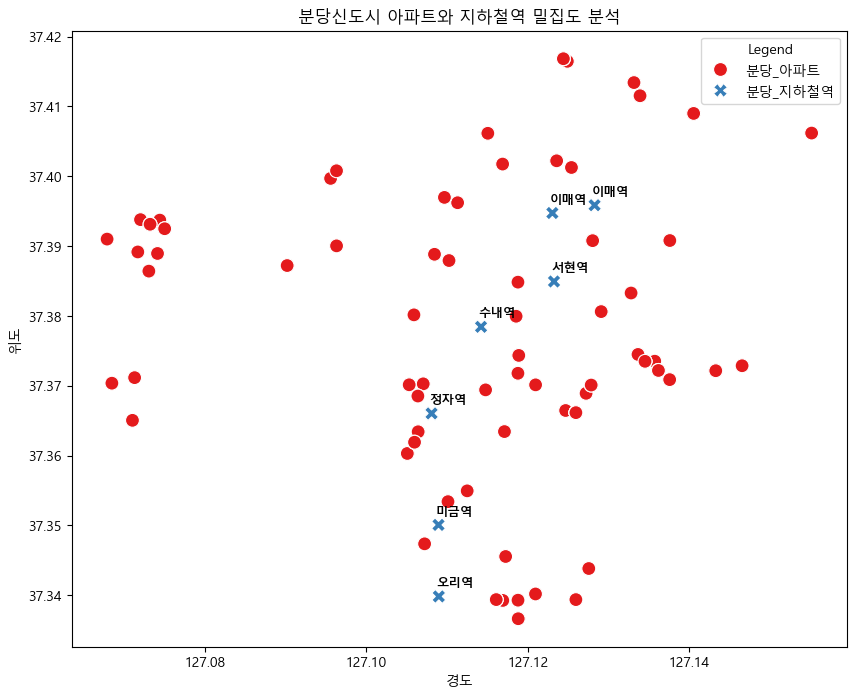

In [16]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=bundang_all_data,
    x='경도', y='위도',
    hue='타입',          # 아파트와 지하철역을 색상으로 구분
    style='타입',     # 클러스터를 모양으로 구분
    palette='Set1',      # 색상 조합 선택
    s=100                # 점 크기
)

# 지하철역 이름 표시
for i, row in bundang_subway_data.iterrows():
    plt.text(
        row['경도']+ 0.002, row['위도']+ 0.001, row['역사명'], 
        fontsize=9, color='black', weight='bold', ha='center', va='bottom'
    )

plt.title('분당신도시 아파트와 지하철역 밀집도 분석')
plt.xlabel('경도')
plt.ylabel('위도')
plt.legend(title='Legend', loc='upper right')
#plt.savefig('C:/Users/saeya/Downloads/bundang_apt_subway_density.png')
plt.show()



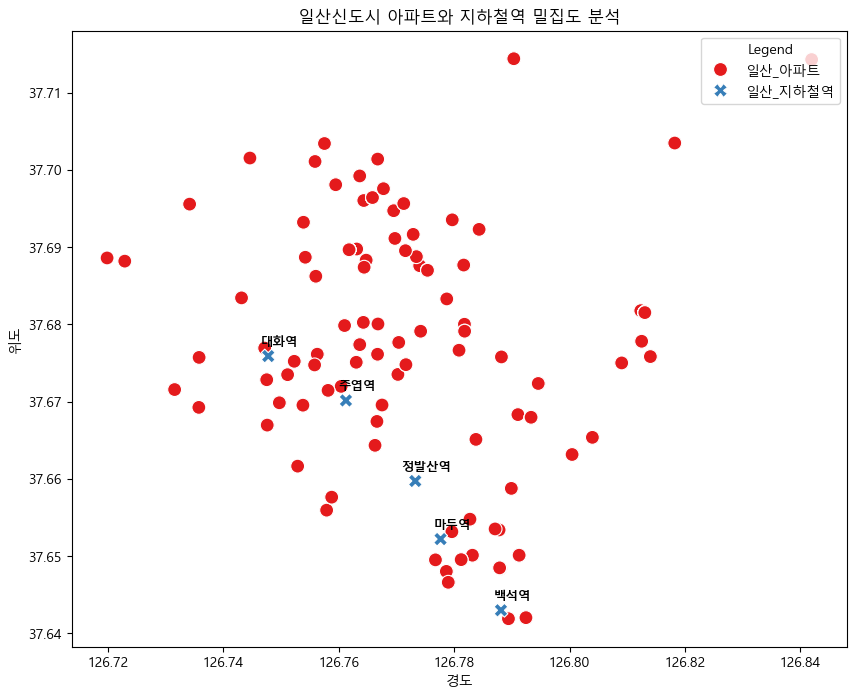

In [18]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=ilsan_all_data,
    x='경도', y='위도',
    hue='타입',          # 아파트와 지하철역을 색상으로 구분
    style='타입',     # 클러스터를 모양으로 구분
    palette='Set1',      # 색상 조합 선택
    s=100                # 점 크기
)
# 지하철역 이름 표시
for i, row in ilsan_subway_data.iterrows():
    plt.text(
        row['경도']+ 0.002, row['위도']+ 0.001, row['역사명'], 
        fontsize=9, color='black', weight='bold', ha='center', va='bottom'
    )

plt.title('일산신도시 아파트와 지하철역 밀집도 분석')
plt.xlabel('경도')
plt.ylabel('위도')
plt.legend(title='Legend', loc='upper right')
#plt.savefig('C:/Users/saeya/Downloads/ilsan_apt_subway_density.png')
plt.show()


In [20]:
# 일산과 분당의 클러스터별 데이터 개수 계산
ilsan_cluster_counts = ilsan_all_data.groupby(['클러스터', '타입']).size().unstack(fill_value=0)
bundang_cluster_counts = bundang_all_data.groupby(['클러스터', '타입']).size().unstack(fill_value=0)

# 총 데이터 개수 계산
ilsan_totals = ilsan_cluster_counts.sum(axis=0)
bundang_totals = bundang_cluster_counts.sum(axis=0)

print("일산 데이터 합계:")
print(ilsan_totals)
print("\n분당 데이터 합계:")
print(bundang_totals)

일산 데이터 합계:
타입
일산_아파트     352
일산_지하철역      5
dtype: int64

분당 데이터 합계:
타입
분당_아파트     265
분당_지하철역      7
dtype: int64


분당신도시 클러스터 별 밀집도:
클러스터
-1     68
 1     20
 16    17
 8     14
 19    13
 18    11
 6     10
 2      9
 7      9
 12     9
 13     9
 3      8
 21     8
 0      7
 9      7
 17     7
 11     6
 15     6
 14     6
 10     6
 5      6
 4      6
 20     5
 22     5
Name: count, dtype: int64
분당신도시 전체 밀집도: 272


일산신도시 클러스터 별 밀집도:
클러스터
-1     123
 8      20
 0      16
 5      16
 6      14
 16     13
 17     12
 9      12
 24      9
 12      9
 3       9
 4       9
 25      8
 23      8
 19      8
 21      7
 7       7
 2       7
 15      6
 10      6
 18      6
 20      6
 22      6
 14      5
 13      5
 11      5
 1       5
Name: count, dtype: int64
일산신도시 전체 밀집도: 357


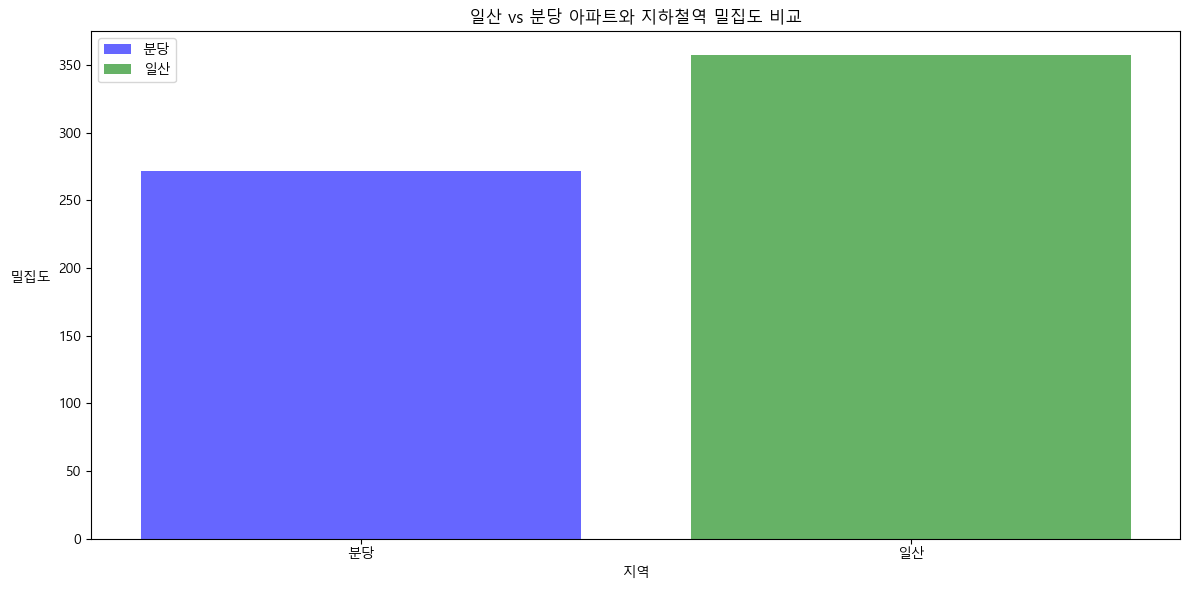

In [22]:
def calculate_density(data, eps=0.002, min_samples=5):
    model = DBSCAN(eps=eps, min_samples=min_samples)
    labels = model.fit_predict(data[['경도', '위도']])
    data['클러스터'] = labels
    cluster_sizes = data['클러스터'].value_counts()
    total_density = len(data)
    return cluster_sizes, total_density

bundang_cluster_sizes, bundang_density = calculate_density(bundang_all_data)
ilsan_cluster_sizes, ilsan_density = calculate_density(ilsan_all_data)

print("분당신도시 클러스터 별 밀집도:")
print(bundang_cluster_sizes)
print("분당신도시 전체 밀집도:", bundang_density)
print("\n")
print("일산신도시 클러스터 별 밀집도:")
print(ilsan_cluster_sizes)
print("일산신도시 전체 밀집도:", ilsan_density)

plt.figure(figsize=(12, 6))

# 분당 밀집도
plt.bar(['분당'], [bundang_density], color='blue', alpha=0.6, label='분당')
# 일산 밀집도
plt.bar(['일산'], [ilsan_density], color='green', alpha=0.6, label='일산')

plt.title('일산 vs 분당 아파트와 지하철역 밀집도 비교')
plt.xlabel('지역')
plt.ylabel('밀집도', rotation=0, labelpad=20)
plt.legend()
plt.tight_layout()
plt.savefig('C:/Users/saeya/Downloads/ilsan_bundang_apt_subway_density.png')
plt.show()


In [ ]:
# 분당: 272개의 점 중 68개가 밀집되지 않은 지역, 나머지 204개는 밀집된 지역
# 일산: 357개의 점 중 123개가 밀집되지 않은 지역, 나머지 234개는 밀집된 지역

In [2]:
pip install folium pandas

   ---------------------------------------- 0.0/108.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.9 kB ? eta -:--:--
   ------------------------------------- -- 102.4/108.9 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 108.9/108.9 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [66]:
pip install geopy

   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --------- ------------------------------ 30.7/125.4 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 125.4/125.4 kB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ---------------------------------------- 40.3/40.3 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [160]:
import folium
from folium.plugins import HeatMap
from geopy.distance import geodesic
from folium import Element

In [164]:
m = folium.Map(location=[37.6584, 126.7686],tiles='cartodbpositron', zoom_start=13)

for idx, row in ilsan_subway_data.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['역사명'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

legend_html = """
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    width: 280px;
    height: 80px;
    background-color: white;
    border:2px solid grey;
    z-index:9999;
    font-size:14px;
    padding: 10px;">
    <strong>일산신도시 아파트와 지하철역의 밀집도</strong><br>
    <i style="background:blue; width:10px; height:10px; float:left; margin-right:5px; display:inline-block;"></i> 일산신도시 지하철역 <br>
    <i style="background:red; width:10px; height:10px; float:left; margin-right:5px; display:inline-block;"></i> 일산신도시 아파트 <br>
</div>
"""

legend = Element(legend_html)
m.get_root().html.add_child(legend)


# 히트맵 데이터 준비
heat_data = [[row['위도'], row['경도']] for idx, row in ilsan_apartment_data.iterrows()]

# 히트맵 추가
HeatMap(heat_data).add_to(m)
m.save('C:/Users/saeya/Downloads/ilsan_subway_apartment_heatmap.html')
m 

In [170]:
m = folium.Map(location=[37.3943, 127.1111],tiles='cartodbpositron', zoom_start=13)

for idx, row in bundang_subway_data.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['역사명'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

heat_data = [[row['위도'], row['경도']] for idx, row in bundang_apartment_data.iterrows()]

# 히트맵 추가
HeatMap(heat_data).add_to(m)

# # 밀집도 계산
# def calculate_density(target_idx, target_row, data, radius=0.5):
#     count = 0
#     target_location = (target_row['위도'], target_row['경도'])
    
#     # 반경 내의 다른 아파트들을 확인
#     for idx, row in data.iterrows():
#         if idx != target_idx:
#             dist = geodesic(target_location, (row['위도'], row['경도'])).km
#             if dist <= radius:
#                 count += 1
#     return count

# for idx, row in bundang_apartment_data.iterrows():
#     density = calculate_density(idx, row, bundang_apartment_data)  # 밀집도 계산
#     folium.Marker(
#         location=[row['위도'], row['경도']],
#         icon=folium.DivIcon(
#             html=f'<div style="font-size: 8pt; color: black;">{density}</div>'
#         )
#     ).add_to(m)

legend_html = """
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    width: 280px;
    height: 80px;
    background-color: white;
    border:2px solid grey;
    z-index:9999;
    font-size:14px;
    padding: 10px;">
    <strong>분당신도시 아파트와 지하철역의 밀집도</strong><br>
    <i style="background:blue; width:10px; height:10px; float:left; margin-right:5px; display:inline-block;"></i> 분당신도시 지하철역 <br>
    <i style="background:red; width:10px; height:10px; float:left; margin-right:5px; display:inline-block;"></i> 분당신도시 아파트 <br>
</div>
"""

legend = Element(legend_html)
m.get_root().html.add_child(legend)


m.save('C:/Users/saeya/Downloads/bundang_subway_apartment_heatmap_withTitle.html')

m